<a href="https://colab.research.google.com/github/Avadhi-Singhal/MachineLearning/blob/main/DecisionTreeAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
## Independent Feature
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
## Depedent Feature
y = iris['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
## Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x

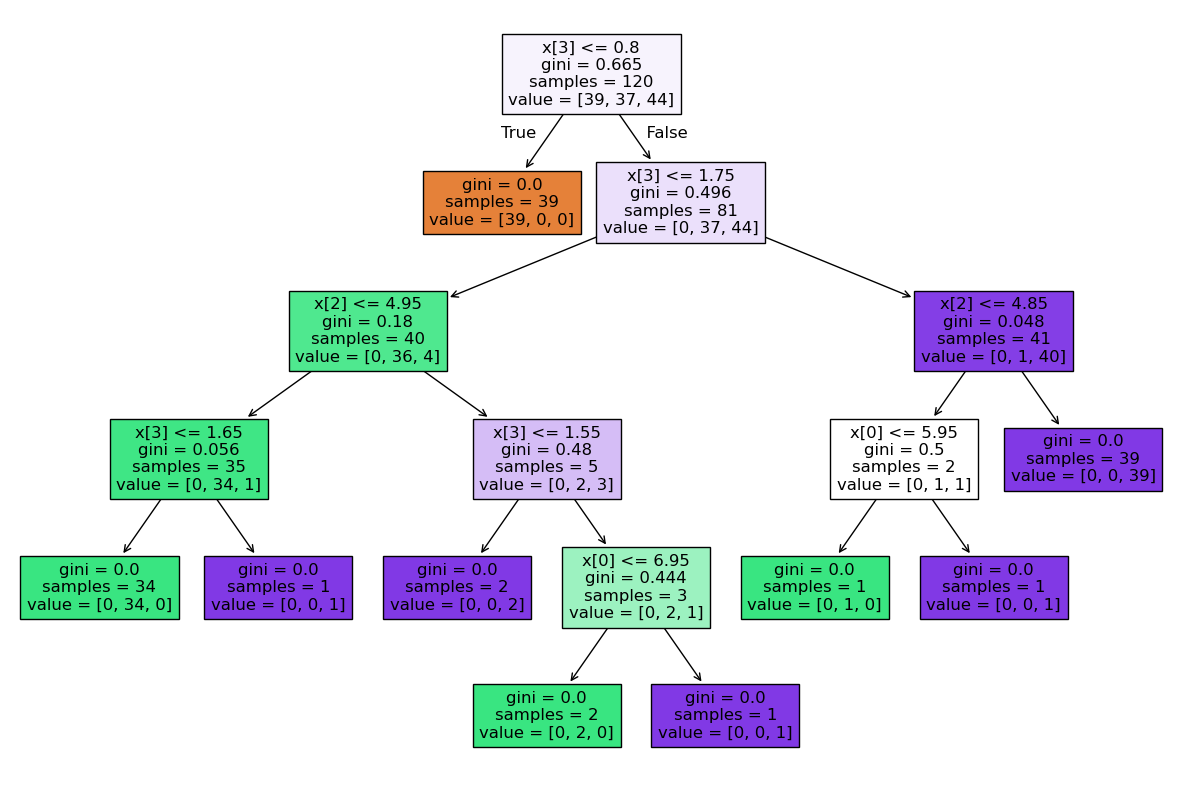

In [ ]:
## Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [ ]:
params = {
   'criterion' : ['gini','entropy','log_loss'],
   'splitter' : ['best','random'],
   'max_depth' : [1,2,3,4,5,6],
   'max_features' : ['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(classifier,param_grid=params,cv=5,scoring='accuracy')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
grid.best_score_

0.9583333333333334

In [ ]:
y_pred1 = grid.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

0.9666666666666667


## **Diabetes** **Prediction**

In [ ]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [ ]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Diabetes Prediction using Decision Tree

In [3]:
import pandas as pd
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
df_diabetes = pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1',
                                                 's2','s3','s4','s5','s6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
x = df_diabetes
y = dataset['target']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

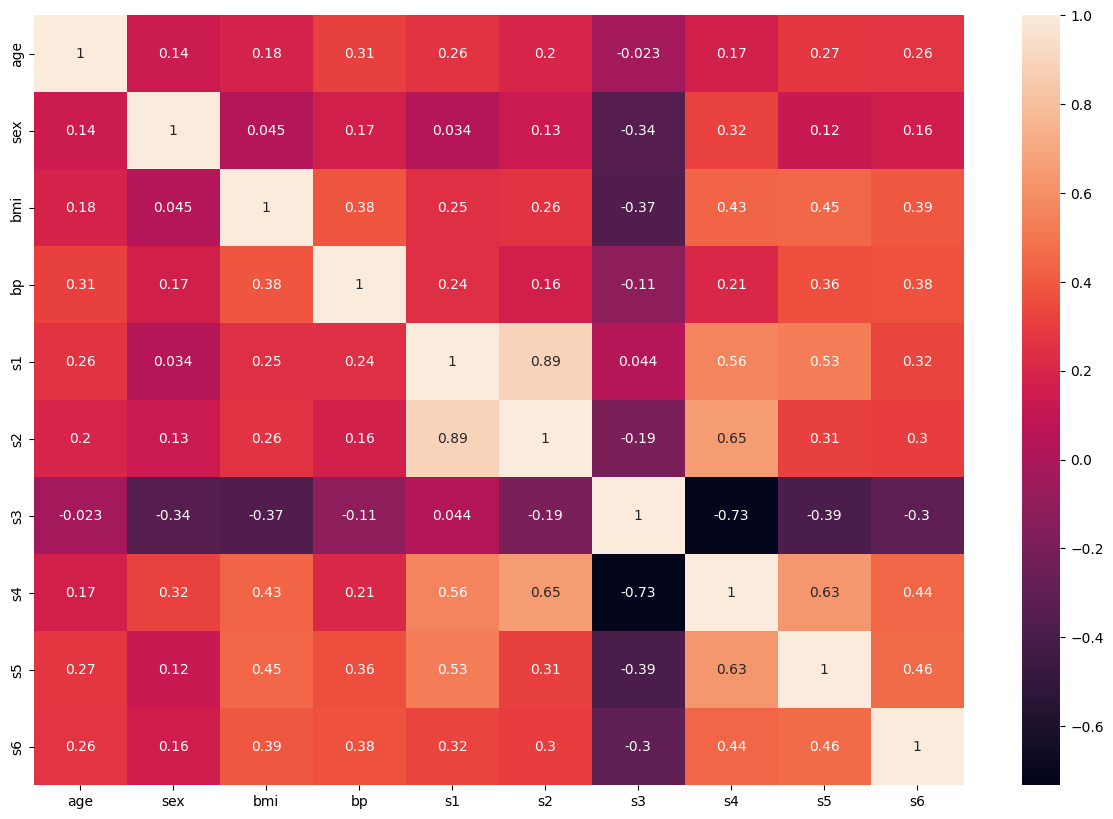

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(),annot=True)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
## Hyperparameter Tuning
param = {
    'criterion' : ['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto','sqrt','log2']
}

In [13]:
from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [14]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [15]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [16]:
y_pred = grid.predict(x_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.41920725207204745
3135.2979991865177
45.024309707901914


In [21]:
selectedmodel = DecisionTreeRegressor(criterion='squared_error',
 max_depth= 3,
 max_features= 'log2',
 splitter= 'best')

In [22]:
selectedmodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

[Text(0.5, 0.875, 'x[7] <= -0.014\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.625, 'x[1] <= 0.003\nsquared_error = 3904.783\nsamples = 122\nvalue = 113.656'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 0.006\nsquared_error = 4125.44\nsamples = 84\nvalue = 123.155'),
 Text(0.0625, 0.125, 'squared_error = 2626.578\nsamples = 65\nvalue = 107.231'),
 Text(0.1875, 0.125, 'squared_error = 5417.917\nsamples = 19\nvalue = 177.632'),
 Text(0.375, 0.375, 'x[3] <= 0.034\nsquared_error = 2776.646\nsamples = 38\nvalue = 92.658'),
 Text(0.3125, 0.125, 'squared_error = 1403.901\nsamples = 34\nvalue = 81.265'),
 Text(0.4375, 0.125, 'squared_error = 3963.25\nsamples = 4\nvalue = 189.5'),
 Text(0.75, 0.625, 'x[8] <= 0.02\nsquared_error = 5865.707\nsamples = 187\nvalue = 180.16'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= -0.007\nsquared_error = 5093.776\nsamples = 89\nvalue = 148.101'),
 Text(0.5625, 0.125, 'squared_error = 2595.195\nsampl

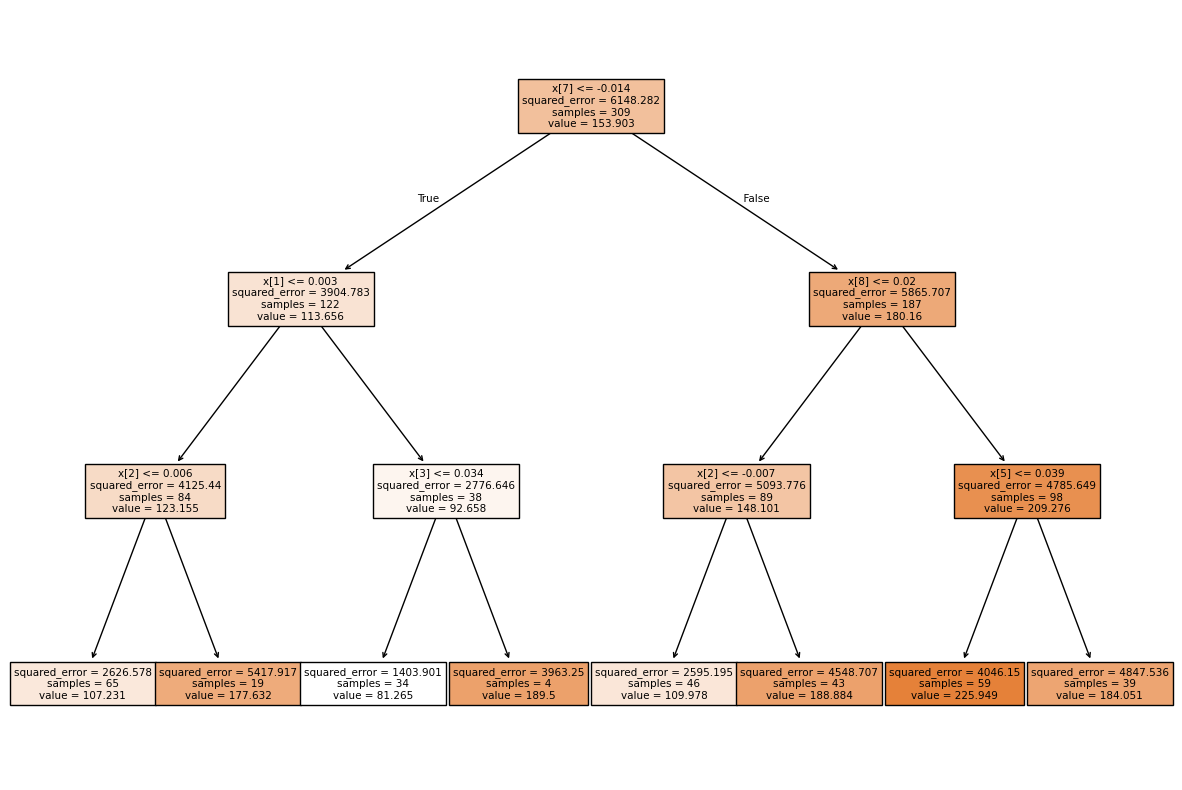

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)